<a href="https://colab.research.google.com/github/cynthiiaa/DataMining/blob/main/DataMining_HM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#**ISL pg. 120 #9**

In [ ]:
# import data
auto_data = pd.read_csv("Auto.csv")

# clean data
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data = auto_data.dropna()

# print info about the data
auto_data.info()
auto_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### a) Produce a scatterplot matrix which includes all of the variables in the data set.

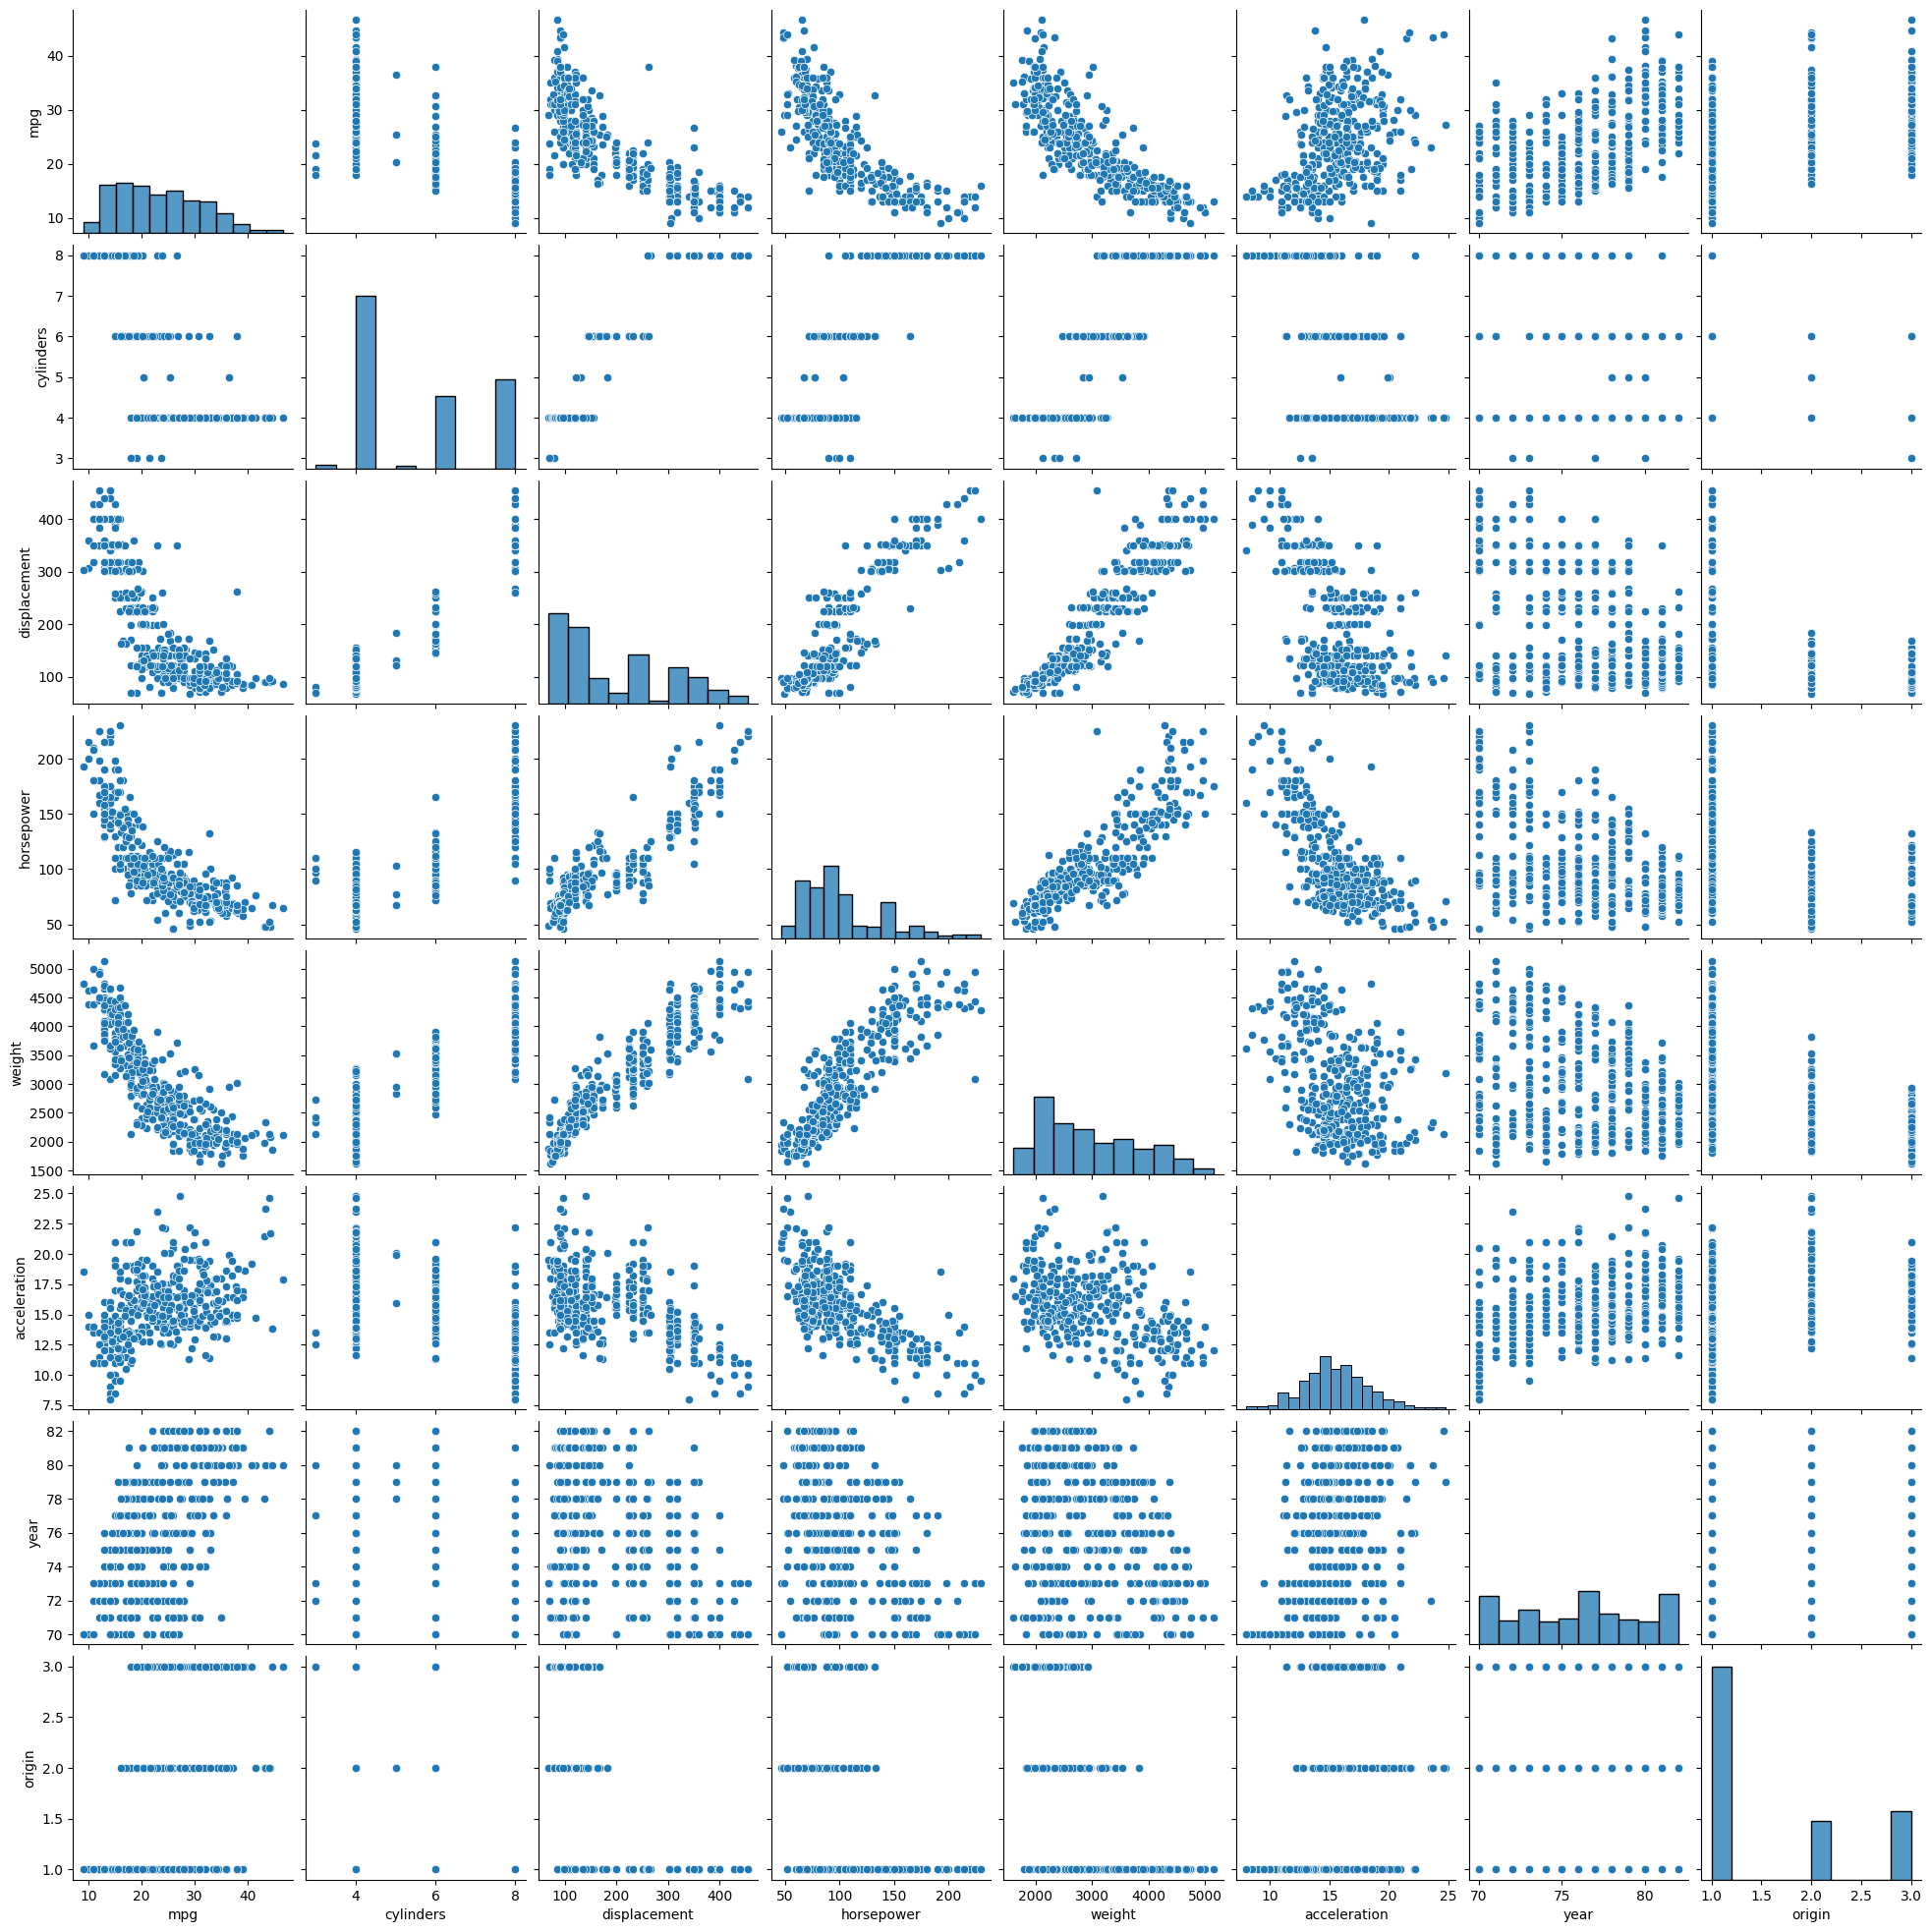

In [ ]:
sns.pairplot(auto_data)

### b) Compute the matrix of correlations between the variables.

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

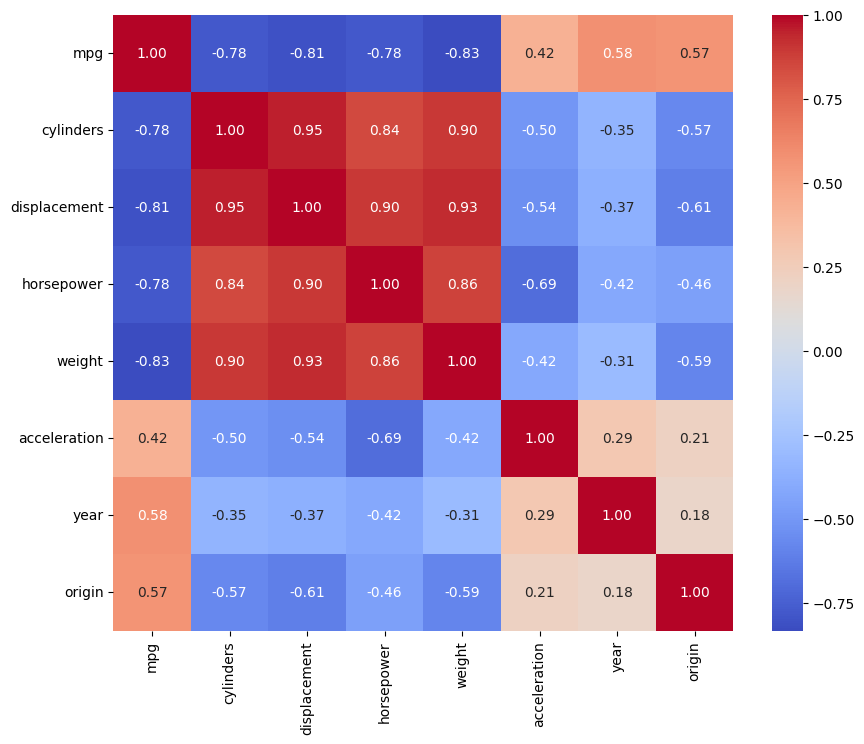

In [ ]:
correlation_matrix = auto_data.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

In [ ]:
import statsmodels.api as sm

# define the predictors and the response
X = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = auto_data['mpg']
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()

# print summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          2.04e-139
Time:                        02:55:47   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

#### i. Is there a relationship between the predictors and the response?

> Yes there is a relationship between the predictors and the response. The adjusted R^2 is 0.818, this is very close to 1 and tells us that a large proportion of the variability in the response is explained by the predictors.

#### ii. Which predictors appear to have a statistically significant relationship to the response?

> The p-value for 4 predictors (displacement, weight, year, and origin) are all less than 0.05. If we set alpha to be 0.05 then those 4 predictors are statistically significant.

#### iii. What does the coefficient for the year variable suggest?

> For each one year increase the mpg for a car is expected to go up by 0.7508, assuming all other variables are held constant. This suggests that newer model cars have better fuel efficiency.

### d) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

> For the Residuals vs Fitted plot, there are a lot of points that deviate from the red horizontal line. Those points have residuals that are much higher or lower than the residuals of other observations. There are several points that suggest unusually large and unusually small outlier.

> My leverage plot shows me that there is low leverage. However the points are not close to the horizontal line, indicating that the residuals are high.

> My regression model has low leverage, but high residuals. There is a high difference between the observed and predicted values of the response variable.

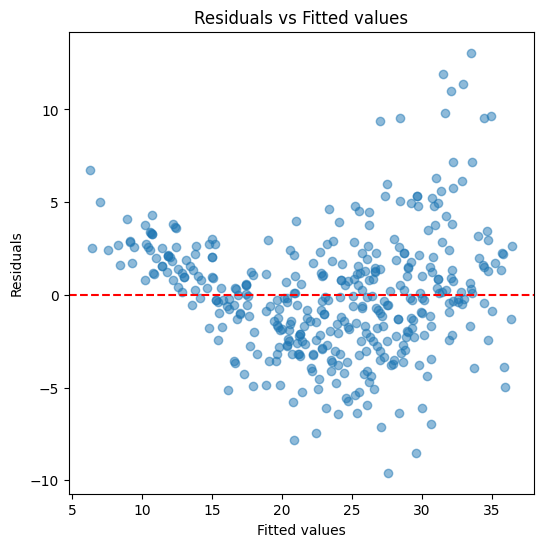

<Figure size 600x600 with 0 Axes>

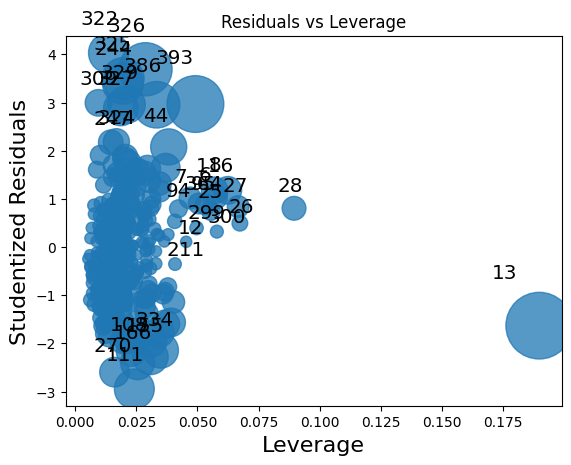

In [ ]:
import matplotlib.pyplot as plt

# Get the residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

# plot residuals vs fitted values
plt.figure(figsize=(6, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# plot residuals vs leverage
plt.figure(figsize=(6, 6))
sm.graphics.influence_plot(model, alpha=0.05, criterion="cooks")
plt.title('Residuals vs Leverage')
plt.show()

### e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [ ]:
import statsmodels.formula.api as smf

formula = "mpg ~ year * weight + origin * displacement"

# fit the model using the formula
model = smf.ols(formula=formula, data=auto_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          6.92e-151
Time:                        02:55:48   Log-Likelihood:                -999.48
No. Observations:                 392   AIC:                             2013.
Df Residuals:                     385   BIC:                             2041.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -106.6915    

### f) Try a few different transformations of the variables, such as log(X), √X, X2.

In [ ]:
# log transformation of displacement and year
model_log = smf.ols(formula='mpg ~ np.log(displacement) * np.log(year)', data=auto_data).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     554.0
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          7.95e-140
Time:                        02:55:48   Log-Likelihood:                -1034.9
No. Observations:                 392   AIC:                             2078.
Df Residuals:                     388   BIC:                             2094.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [ ]:
# square root transformation of year
model_sqrt = smf.ols(formula='mpg ~ np.sqrt(year)', data=auto_data).fit()
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.11e-36
Time:                        02:55:48   Log-Likelihood:                -1281.3
No. Observations:                 392   AIC:                             2567.
Df Residuals:                     390   BIC:                             2575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -162.7122     13.293    -12.241

In [ ]:
# square transformation of weight and square root transformation of weight
model_square = smf.ols(formula='mpg ~ np.square(weight)*np.sqrt(weight)', data=auto_data).fit()
print(model_square.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     324.6
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          2.18e-105
Time:                        02:55:48   Log-Likelihood:                -1115.1
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     388   BIC:                             2254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [ ]:
formula = 'mpg ~ weight + year + np.log(displacement)'
model = smf.ols(formula=formula, data=auto_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     581.9
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          3.44e-143
Time:                        02:55:48   Log-Likelihood:                -1027.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     388   BIC:                             2078.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9993 

# **ISL pg. 120 #10**

In [ ]:
# !pip install ISLP

In [ ]:
from ISLP import load_data
carseats = load_data('Carseats')
carseats.info()
carseats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [ ]:
# one-hot encode the 'Urban' and 'US' columns
carseats = pd.get_dummies(carseats, columns=["Urban", "US"], drop_first=True)

# selecting the predictors and the response variable
X = carseats[["Price", "Urban_Yes", "US_Yes"]]
y = carseats["Sales"]
X = sm.add_constant(X)

# fit the regression model
model = sm.OLS(y, X).fit()

# summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.39e-23
Time:                        02:55:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

### b) Provide an interpretation of each coefficient in the model.

> The estimated intercept is 13.044, this is the estimated sales when price is 0, US is no, and Urban is no.

> The Price coefficient is -0.0545. For every unit increase in price, sales is expected to decrease by about 0.0545 units when holding other variables constant.

> The Urban_Yes coefficient is -0.0219. Sales in urban areas are estimated to be about 0.0219 units lower than in non-urban areas when holding other variables constant.

> The US_Yes coefficient is 1.2006. Sales in the US are estimated to be about 1.2005 units higher than outside the US when holding other variables constant.

### c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$$
\text{Sales} = 13.0435 - 0.0545 \times \text{Price} - 0.0219 \times \text{Urban_Yes} + 1.2006 \times \text{US_Yes}
$$

### d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

> Price and Urban_Yes both have a p-value less than 0.05, so we can reject the null hypothesis for both of those predictors.

### e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [ ]:
# selecting the new predictors and the response variable
X_new = carseats[["Price", "Urban_Yes"]]
X_new = sm.add_constant(X_new)

# fit the regression model
model = sm.OLS(y, X_new).fit()

# summary
summary2 = model.summary()
print(summary2)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     49.01
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           9.49e-20
Time:                        02:55:48   Log-Likelihood:                -938.22
No. Observations:                 400   AIC:                             1882.
Df Residuals:                     397   BIC:                             1894.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6215      0.655     20.789      0.0

### f) How well do the models in (a) and (e) fit the data?

> The newer model has an R^2 and adjusted R^2 that is lower than the model in part a. This tells us that the newer model doesn't explain the variability in Sales as good as the original model.

> In both models Price remains statistically significant, while Urban_Yes is not statistically significant with the new model.

> The first model had an overall better fit.

### g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

    const (Intercept):
        95% CI: [12.333,14.910]

    Price:
        95% CI: [−0.064,−0.043]

    Urban_Yes:
        95% CI: [−0.513,0.581]

### h) Is there evidence of outliers or high leverage observations in the model from (e)?

> There doesn't seem to be a lot of outliers with the model from part e. The first plot looks circular and formless, which tells us that the residuals are normally distributed. The second plot also show that there is low leverage.

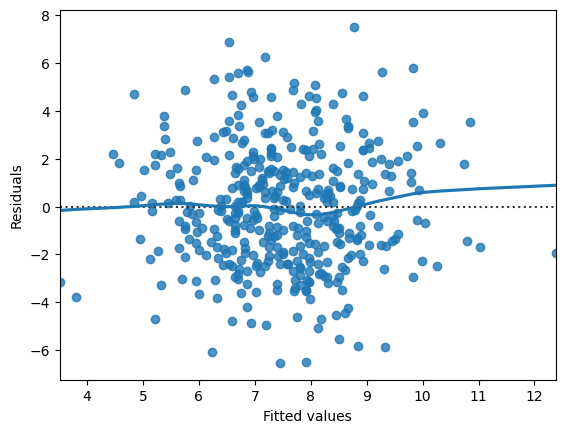

In [ ]:
from statsmodels.formula.api import ols

# fit the model
model = ols("Sales ~ Price + Urban_Yes", data=carseats).fit()

# predicted values and residuals
carseats['predicted'] = model.fittedvalues
carseats['residuals'] = model.resid

# plot residuals
sns.residplot(x='predicted', y='residuals', data=carseats, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()


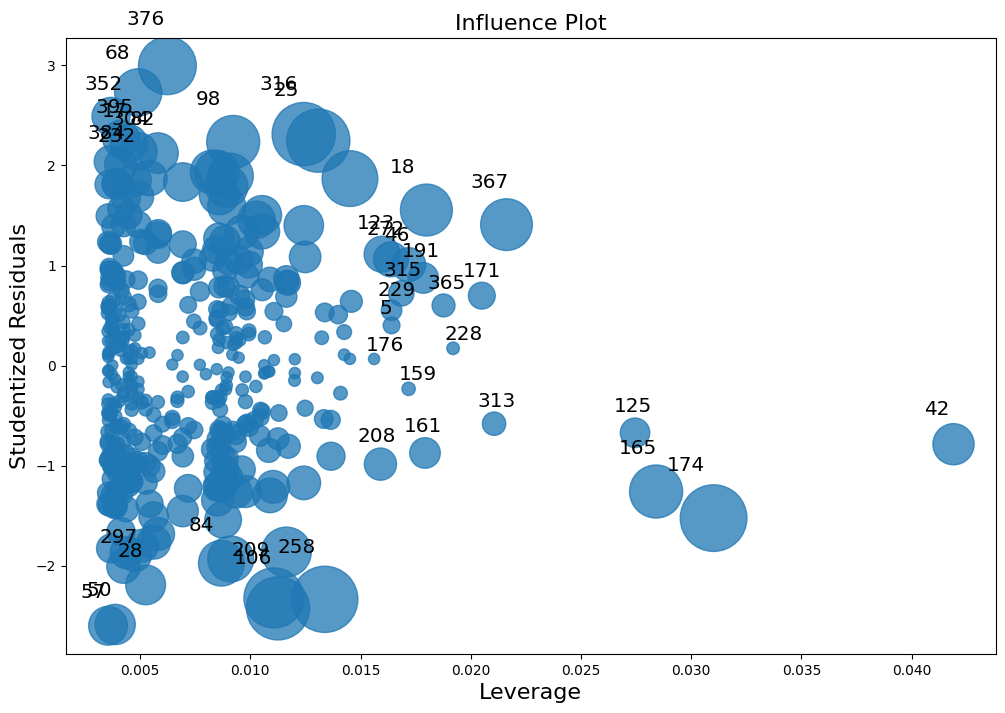

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

In [ ]:
from scipy.stats import zscore

carseats['z_residuals'] = zscore(carseats['residuals'])

# observations with high z-score for residuals
outliers = carseats[(carseats['z_residuals'] > 2) | (carseats['z_residuals'] < -2)]

print("The number of outliers:", len(outliers))
print("\n", outliers)

The number of outliers: 19

      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
17   12.29        147      74           13         251    131      Good   52   
25   14.90        139      32            0         176     82      Good   54   
28    2.99        103      74            0         359     97       Bad   55   
50    1.42         99      32           18         341    108       Bad   80   
57    0.91         93      91            0          22    117       Bad   75   
68   13.39        149      69           20         366    134      Good   60   
82   11.62        151      83            4         325    139      Good   28   
98   12.49        122      77           24         382    127      Good   36   
106   0.16        102      33            0         217    139    Medium   70   
209   3.02         98      21           11         326     90       Bad   76   
232  13.14        137      80           10          24    105      Good   61   
258   3.47 

# **ISL pg. 120 #13**

### a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N (0, 1) distribution. This represents a feature, X.

In [ ]:
# set the seed
np.random.seed(1)

# generate 100 random numbers from a N(0, 1) distribution
x = np.random.normal(loc=0, scale=1, size=100)

### b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [ ]:
# generate 100 random numbers from a N(0, 0.25) distribution
eps = np.random.normal(loc=0, scale=0.5, size=100)

### c) Using x and eps, generate a vector y according to the model
$$ Y =−1+0.5X+ε $$

What is the length of the vector y? What are the values of β0 and β1 in this linear model?

> The length of y is 100

> β0 is -1

> β1 is 0.5

In [ ]:
y = -1 + 0.5 * x + eps

In [ ]:
len(y)

100

### d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

> It looks like there is a positive linear relationship between x and y.

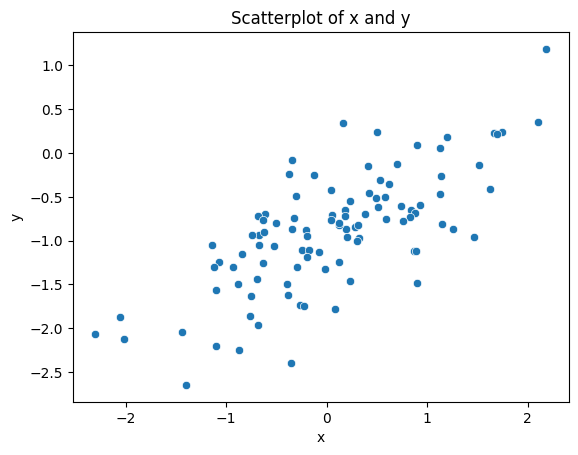

In [ ]:
sns.scatterplot(x=x, y=y)

# create plot and display it
plt.title('Scatterplot of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

> β^​0​ and β^1 are very close to the true β​0​ and β1​.

> β^​0​ = -0.9265 which is close to -1 and β^​1 = 0.5477 which is close to 0.5

In [ ]:
X = sm.add_constant(x)

# fit the least squares linear model
model = sm.OLS(y, X).fit()

# print summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.20e-17
Time:                        02:55:50   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

### f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.

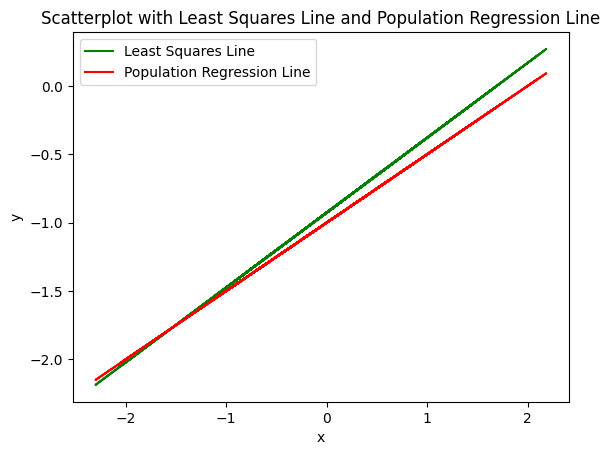

In [ ]:
# plot the least squares line using the estimated coefficients from the OLS model
plt.plot(x, -0.9265 + 0.5477*x, label='Least Squares Line', color='green')

# plot the population regression line using the true coefficients β0 = -1 and β1 = 0.5
plt.plot(x, -1 + 0.5*x, label="Population Regression Line", color="red")

# create the graph
plt.title("Scatterplot with Least Squares Line and Population Regression Line")
plt.xlabel("x")
plt.ylabel("y")

# add legend
plt.legend()

# display plot
plt.show()

### g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

> The quadratic term does not improve the model fit. The adjusted R^2 is slightly lower compared to the previous model. The p-value for x^2 is very high, it's 0.856, this tells us that the x^2 term is not statistically significant.

In [ ]:
# create x^2 feature
x2 = x**2

# combine x and x2
X = np.column_stack((x, x2))
X = sm.add_constant(X)

# fit the polynomial regression model
model_poly = sm.OLS(y, X).fit()

# print summary
summary_poly = model_poly.summary()
print(summary_poly)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.83e-16
Time:                        02:55:50   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

### h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the vari- ance of the normal distribution used to generate the error term ε in (b). Describe your results.

In [ ]:
# the variance is 0.1 and the standard deviation is sqrt(0.1)
eps_less_noise = np.random.normal(loc=0, scale=np.sqrt(0.1), size=100)

# generate y according to the model Y = -1 + 0.5*X + ε
y_less_noise = -1 + 0.5 * x + eps_less_noise

> There is still a postive, linear relationship between x and y_less_noise

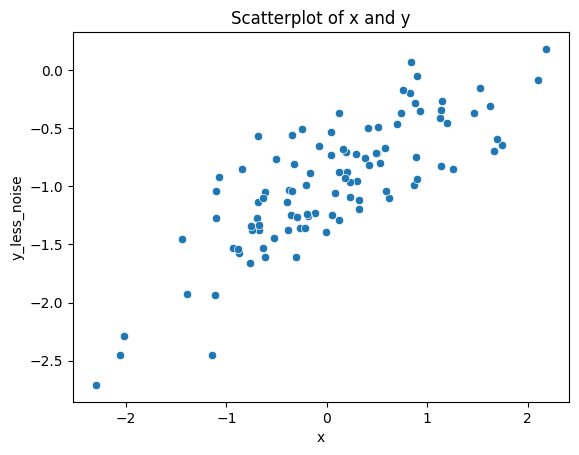

In [ ]:
sns.scatterplot(x=x, y=y_less_noise)

# create plot and display it
plt.title('Scatterplot of x and y')
plt.xlabel('x')
plt.ylabel('y_less_noise')
plt.show()

> β^​0​ and β^1 are very close to the true β​0​ and β1​.

> β^​0​ = -0.9961 which is close to -1 and β^​1 = 0.487 which is close to 0.5

In [ ]:
X = sm.add_constant(x)

# fit the least squares linear model
model = sm.OLS(y_less_noise, X).fit()

# print summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           5.83e-24
Time:                        02:55:51   Log-Likelihood:                -27.192
No. Observations:                 100   AIC:                             58.38
Df Residuals:                      98   BIC:                             63.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9961      0.032    -30.978      0.0

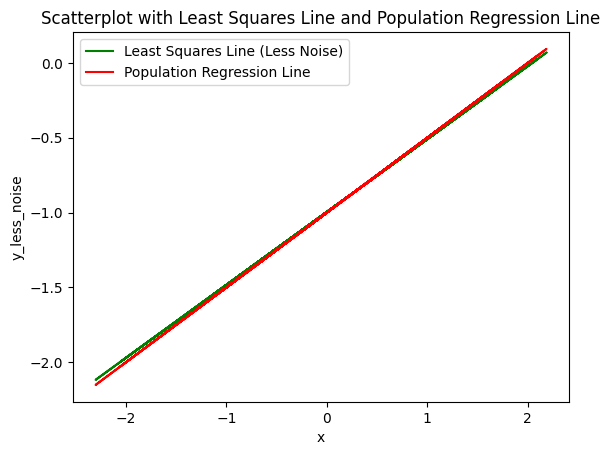

In [ ]:
# plot the least squares line using the estimated coefficients from the OLS model
plt.plot(x, -0.9961 + 0.487*x, label='Least Squares Line (Less Noise)', color='green')

# plot the population regression line using the true coefficients β0 = -1 and β1 = 0.5
plt.plot(x, -1 + 0.5*x, label="Population Regression Line", color="red")

# create the graph
plt.title("Scatterplot with Least Squares Line and Population Regression Line")
plt.xlabel("x")
plt.ylabel("y_less_noise")

# add legend
plt.legend()

# display plot
plt.show()

### i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

In [ ]:
# increasing the variance from 0.25 to 1 to add more noise
eps_more_noise = np.random.normal(loc=0, scale=1, size=100)

# Generate the response variable y with more noise using the original model: Y = -1 + 0.5*X + ε
y_more_noise = -1 + 0.5 * x + eps_more_noise

> There doesn't seem to be a relationship between x and y_more_noise

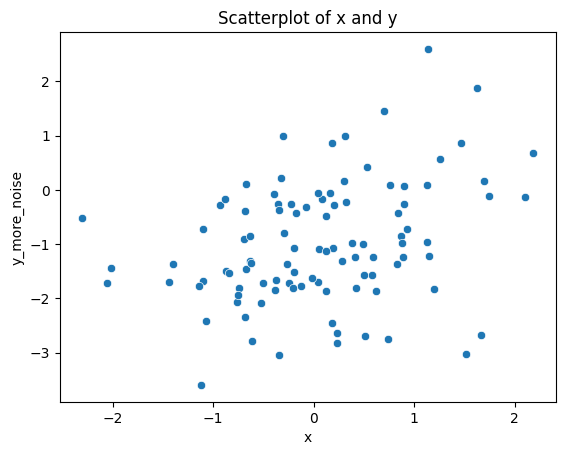

In [ ]:
sns.scatterplot(x=x, y=y_more_noise)

# create plot and display it
plt.title('Scatterplot of x and y')
plt.xlabel('x')
plt.ylabel('y_more_noise')
plt.show()

> Both β^​0​ and β^1 are father away from β0 and β1 when compared to the less_noise model​.

> β^​0​ = -1.0140 which isn't as close to -1 and β^​1 = 0.3943 which isn't as close to 0.5

In [ ]:
X = sm.add_constant(x)

# fit the least squares linear model
model = sm.OLS(y_more_noise, X).fit()

# print summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.62
Date:                Wed, 27 Sep 2023   Prob (F-statistic):            0.00154
Time:                        02:55:51   Log-Likelihood:                -147.75
No. Observations:                 100   AIC:                             299.5
Df Residuals:                      98   BIC:                             304.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0140      0.107     -9.445      0.0

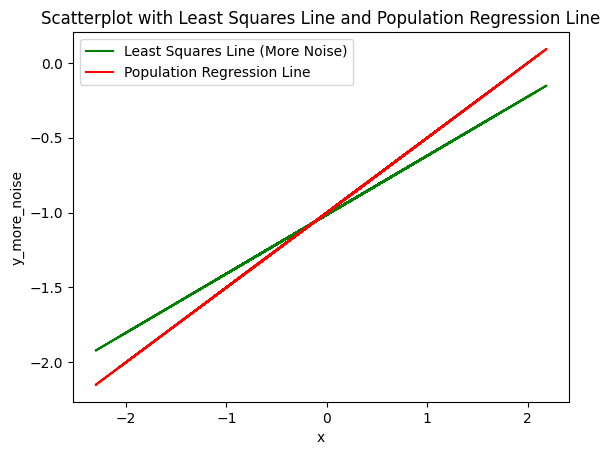

In [ ]:
# plot the least squares line using the estimated coefficients from the OLS model
plt.plot(x, -1.014 + 0.3943*x, label='Least Squares Line (More Noise)', color='green')

# plot the population regression line using the true coefficients β0 = -1 and β1 = 0.5
plt.plot(x, -1 + 0.5*x, label="Population Regression Line", color="red")

# create the graph
plt.title("Scatterplot with Least Squares Line and Population Regression Line")
plt.xlabel("x")
plt.ylabel("y_more_noise")

# add legend
plt.legend()

# display plot
plt.show()

### What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

Original Dataset:

    β0​ (const):
        Lower Bound: −1.020
        Upper Bound: −0.833
    β1​ (x1​):
        Lower Bound: 0.443
        Upper Bound: 0.653

More Noise Dataset:

    β0​ (const):
        Lower Bound: −1.227
        Upper Bound: −0.801
    β1​ (x1​):
        Lower Bound: 0.154
        Upper Bound: 0.634

Less Noise Dataset:

    β0​ (const):
        Lower Bound: −1.060
        Upper Bound: −0.932
    β1​ (x1​):
        Lower Bound: 0.415
        Upper Bound: 0.559